# Description of dataset

SO this is the dataset for Fire, Traffic, EMS for Montgomery County, PA . We can see the time , month , date , everything about the emergency calls so as when the calls were made at what time the calls were made , for what purpose calls the calls were made etc. . What were the type of calls that were mostly made and many more.

In [1]:
import pandas as pd
import numpy as np
calls = pd.read_csv('D:\\python lab\\Emergency calls.zip')
calls.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [2]:
calls.shape

(423909, 9)

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [4]:
print(calls.isnull().values.any())

True


In [5]:
nan_cols = calls.columns[calls.isnull().any()]
calls[nan_cols].isnull().sum()

zip    52129
twp      159
dtype: int64

In [6]:
calls.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

In [7]:
calls.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [8]:
calls['zip'].median()

19401.0

In [9]:
calls['zip'].mode()

0    19401.0
dtype: float64

In [10]:
calls['zip'].value_counts()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
           ...  
19425.0        1
18911.0        1
18902.0        1
18104.0        1
8065.0         1
Name: zip, Length: 170, dtype: int64

In [12]:
calls['zip'].fillna(19401.0 , inplace = True)
calls.isnull().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp          159
addr           0
e              0
dtype: int64

In [13]:
# Most frequent values in the twp column data
calls['twp'].value_counts()

LOWER MERION     36441
ABINGTON         25835
NORRISTOWN       23883
UPPER MERION     22694
CHELTENHAM       19629
                 ...  
HATFIELD BORO      865
BRYN ATHYN         835
GREEN LANE         259
PHILA COUNTY       172
LEHIGH COUNTY       95
Name: twp, Length: 68, dtype: int64

In [15]:
calls['twp'].fillna('LOWER MERION' , inplace = True)
calls.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

# We see the last column 'e' has no significance as its a dummy column and all the entries are equal to 1, so its better to discard that column.

In [17]:
calls.drop("e", axis=1, inplace= True)
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE


In [18]:
calls['timeStamp'][0]

'2015-12-10 17:10:52'

In [ ]:
# As we can see from above that the timestamp is string not a datetime object.
# Used pd.to_datetime to convert the column from strings to DateTime objects.

In [20]:
# Now you can see timeStamp is not a string anymore.
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 8 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          423909 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423909 non-null object
addr         423909 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 25.9+ MB


In [23]:
calls['year']=calls['timeStamp'].apply(lambda time:time.year)
calls['Month']=calls['timeStamp'].apply(lambda title:title.month)
calls['Day of Week']=calls['timeStamp'].apply(lambda title:title.dayofweek)
calls['Hour']=calls['timeStamp'].apply(lambda title:title.hour)

In [24]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,type,year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,3,16


In [21]:
calls["type"] = calls["title"].apply(lambda x: x.split(':')[0])
print(calls["type"].value_counts())

EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64


In [25]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,type,year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,3,16


In [26]:
d = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['Day of Week'] = calls['Day of Week'].map(d)

In [27]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,type,year,Month,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,Thu,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,Thu,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,Thu,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,Thu,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,Thu,16


In [43]:
calls["day/night"] = calls["timeStamp"].apply(lambda x : "night" if int(x.strftime("%H")) > 19 else "day")

In [44]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,type,year,Month,Day of Week,Hour,day/night
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,2015,12,Thu,17,day
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,2015,12,Thu,17,day
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,2015,12,Thu,14,day
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,2015,12,Thu,16,day
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401.0,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,2015,12,Thu,16,day


# Q.1  How many different types of calls ?

In [45]:
calls["type"] = calls["title"].apply(lambda x: x.split(':')[0])
print(calls["type"].value_counts())

EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64


In [46]:
# So as we can see there are broadly  three different types of cars.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import os

EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64


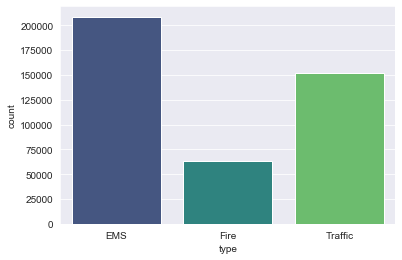

In [48]:
df=calls['type'].value_counts()
print(df)
sns.countplot(x='type',data=calls,palette='viridis')

In [49]:
# Count of all emergencies under each type(EMS,Traffic,Fire) have been discribed above .

In [50]:
print(calls["title"][calls["title"].str.match("EMS")].value_counts())
print(calls["title"][calls["title"].str.match("Traffic")].value_counts())
print(calls["title"][calls["title"].str.match("Fire")].value_counts())

EMS: FALL VICTIM              21253
EMS: RESPIRATORY EMERGENCY    21158
EMS: CARDIAC EMERGENCY        20616
EMS: VEHICLE ACCIDENT         16928
EMS: SUBJECT IN PAIN          12001
                              ...  
EMS: DISABLED VEHICLE             1
EMS: POLICE INFORMATION           1
EMS: HIT + RUN                    1
EMS: PUBLIC SERVICE               1
EMS: VEHICLE LEAKING FUEL         1
Name: title, Length: 80, dtype: int64
Traffic: VEHICLE ACCIDENT -             98401
Traffic: DISABLED VEHICLE -             31871
Traffic: ROAD OBSTRUCTION -             14134
Traffic: HAZARDOUS ROAD CONDITIONS -     4395
Traffic: VEHICLE FIRE -                  2286
Traffic: VEHICLE LEAKING FUEL -           232
Traffic: DEBRIS/FLUIDS ON HIGHWAY -       139
Name: title, dtype: int64
Fire: FIRE ALARM                      24380
Fire: VEHICLE ACCIDENT                 7153
Fire: FIRE INVESTIGATION               5955
Fire: GAS-ODOR/LEAK                    4304
Fire: ELECTRICAL FIRE OUTSIDE          310

# Q.3 At what time od day/month i can expect which type of calls?

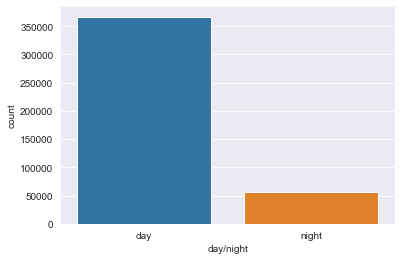

In [53]:
sns.countplot(x='day/night' , data=calls)

Text(0.5, 1.0, 'Call type by Hour')

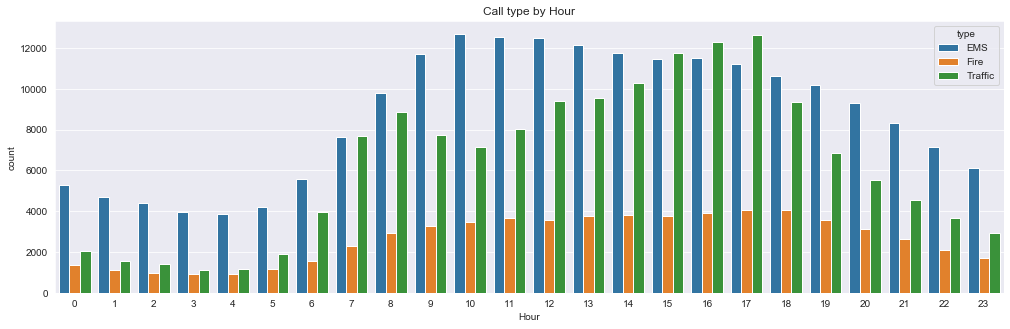

In [83]:
fig_dims = (17,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Hour',data=calls,hue='type')
plt.title('Call type by Hour')

In [ ]:
# The time of month in which we can expect the type of call

Text(0.5, 1.0, 'Call type by Month')

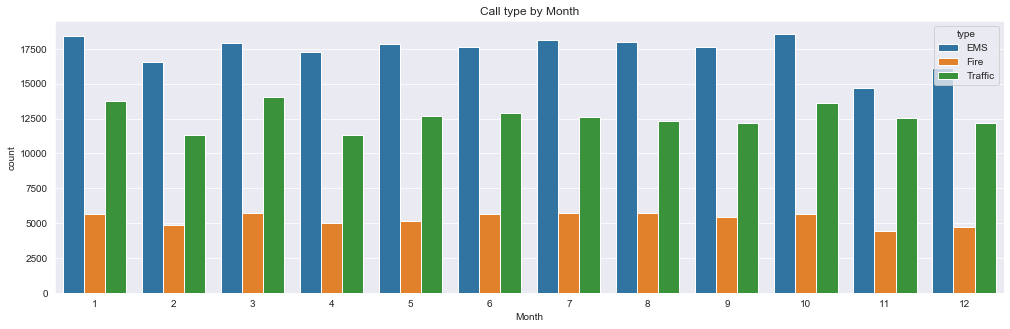

In [82]:
fig_dims = (17,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Month',data=calls,hue='type')
plt.title('Call type by Month')

# Q.4 Visualize the percentage share of emergency type for each call.

EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64


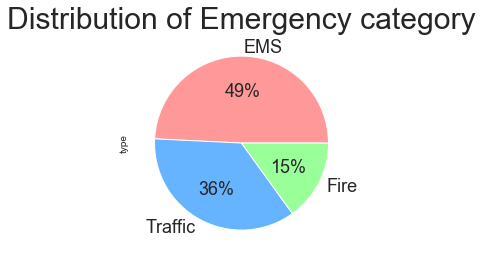

In [84]:
calls["type"] = calls["title"].apply(lambda x: x.split(':')[0])
print(calls["type"].value_counts())
calls["type"].value_counts().plot(fontsize = 18,
                                       kind = 'pie',
                                      autopct = "%1.0f%%",
                                     colors = ['#ff9999','#66b3ff','#99ff99'],
                                   )
plt.title("Distribution of Emergency category", fontsize=30)
plt.show()